Num GPUs Available:  1
GPU is available, using GPU for training.
Found 19858 images belonging to 2 classes.
Found 3504 images belonging to 2 classes.
87910968/87910968 [==============================] - 19s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 batch_normalization_94 (Bat  (None, 256)  

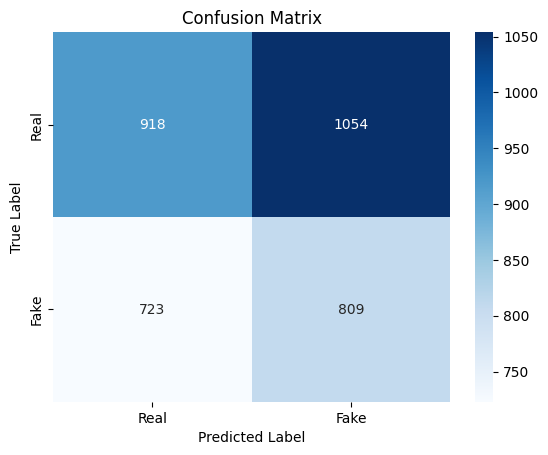

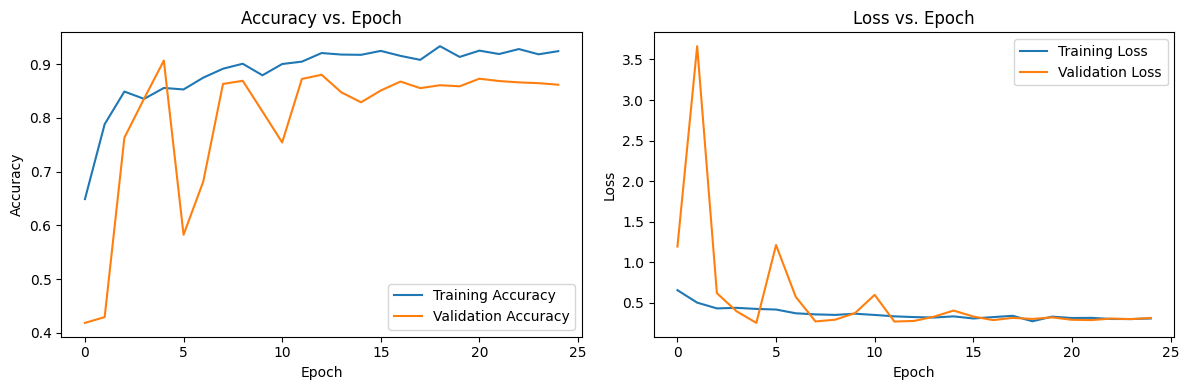

Found 7510 images belonging to 2 classes.
470/470 [==============================] - 59s 121ms/step
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]
Classification Report:
              precision    recall  f1-score   support

        Real       0.99      0.92      0.95      3789
        Fake       0.93      0.99      0.96      3721

    accuracy                           0.96      7510
   macro avg       0.96      0.96      0.96      7510
weighted avg       0.96      0.96      0.96      7510

Confusion Matrix:
[[3504  285]
 [  48 3673]]


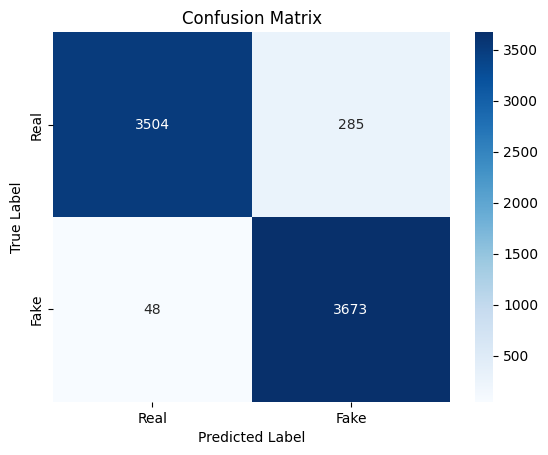

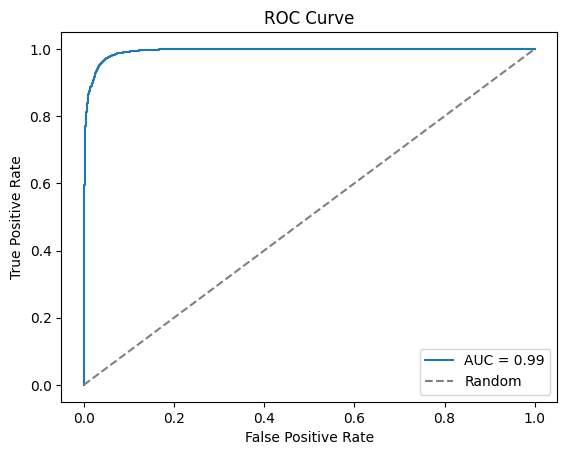

Evaluation Metrics:
accuracy: 0.955659121171771
precision: 0.9864864864864865
recall: 0.9247822644497229
f1_score: 0.9546383326522272
auc: 0.9935701225396164
Сообщение об окончании работы отправлено в Telegram.
Программа завершила работу.


In [1]:
import model_fit_evaluate  
from tensorflow.keras.applications import ResNet50V2, InceptionV3, EfficientNetB2
from tensorflow.keras.applications.resnet_v2 import preprocess_input as preprocess_input_resnet50v2
from tensorflow.keras.applications.inception_v3 import preprocess_input as preprocess_input_inceptionv3
from tensorflow.keras.applications.efficientnet import preprocess_input as preprocess_input_efficientnetb2
import tensorflow as tf
import os 
import telebot

if __name__ == '__main__':

    data_dir = 'train'
    image_size = (224, 224)
    batch_size = 4 
    epochs = 40

    train_generator, validation_generator = model_fit_evaluate.create_data_generators(data_dir, image_size, batch_size, preprocessing_function=preprocess_input_efficientnetb2)

    model = model_fit_evaluate.create_custom_model(
    base_model=InceptionV3, 
    weights="imagenet",  
    input_shape=(224, 224, 3), 
    num_classes=1, 
    trainable_base=True 
    )

    history = model_fit_evaluate.train_model(model, train_generator, validation_generator, epochs, batch_size, early_stopping_patience=6, reduce_lr_patience=2, reduce_lr_factor=0.5)

    model_fit_evaluate.evaluate_model(model, validation_generator)

    model_fit_evaluate.plot_training_history(history)
    
    test_data_dir = 'test'

    metrics = model_fit_evaluate.evaluate_model_on_test_data(model, test_data_dir, preprocess_input_efficientnetb2, image_size=image_size, batch_size=16) #Added Image Size

    print("Evaluation Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")


Found 10110 images belonging to 2 classes.
632/632 [==============================] - 160s 253ms/step
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]
Classification Report:
              precision    recall  f1-score   support

        Real       0.98      0.69      0.81      5089
        Fake       0.76      0.99      0.86      5021

    accuracy                           0.84     10110
   macro avg       0.87      0.84      0.84     10110
weighted avg       0.87      0.84      0.84     10110

Confusion Matrix:
[[3522 1567]
 [  58 4963]]


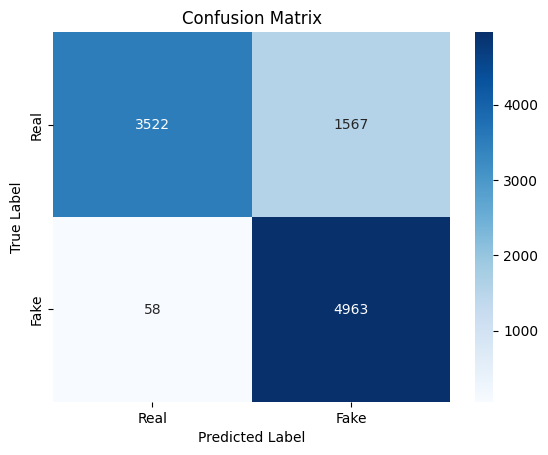

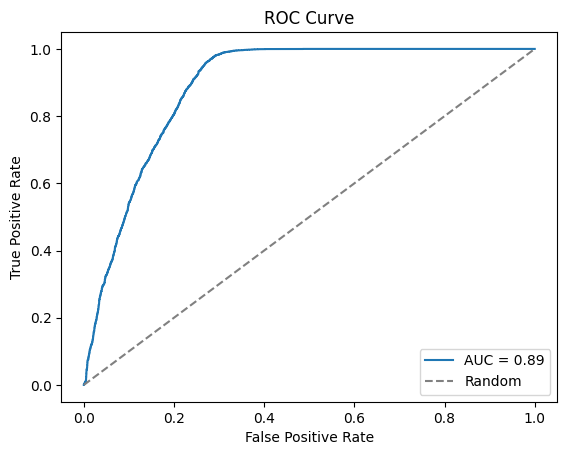

Evaluation Metrics:
accuracy: 0.8392680514342236
precision: 0.9837988826815642
recall: 0.6920809589310277
f1_score: 0.8125504671819126
auc: 0.8896067250501323


In [7]:
    metrics = model_fit_evaluate.evaluate_model_on_test_data(model, 'OF/test', preprocess_input_efficientnetb2, image_size=image_size, batch_size=16) #Added Image Size

    print("Evaluation Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

In [8]:
 model.save('InceptionV3_Deepfake.keras')